<h2>1. Моделювання та розв’язання задачі лінійного програмування:  </h2>
a. Оберіть завдання за номером журналу групи<br>
b. Опишіть введені змінні.<br>
c. Створіть математичну модель задачі.  <br>
d. Знайдіть рішення, використовуючи графічне представлення задачі лінійного програмування. Малюнок повинен містити лінії з їх рівняннями, виділеною напівплощиною, що задовольняє вихідним нерівностям, область допустимих рішень, точку оптимального рішення, лінію рівня.  <br>
e. Розв’яжіть задачу за допомогою scipy.optimize.  <br>
f. Розв’яжіть задачу за допомогою pulp.LpProblem.  <br>
g. Порівняйте рішення за допомогою np.allclose ().  <br>
h. Порівняйте час для розв’язання задачі за допомогою scipy.optimize та pulp.LpProblem.  <br>
i. Поясніть отриманий результат.  <br>

<h4>А. Завдання</h4>
6. Для підживлення рослин необхідно внести на один гектар: не менш, ніж 24 ум. од. хімічної речовини В<sub>1</sub>, 30 ум. од. – В<sub>2</sub> і 15 ум. од. – В<sub>3</sub>. Усі ці речовини містяться у комбінованих добавках У<sub>1</sub> та У<sub>2</sub> у кількостях, які наведені у таблиці. Яку кількість комбінованих добрив кожного типу треба придбати, щоб забезпечити внесення необхідної кількості хімічних речовин, зробивши при цьому мінімальні витрати.
<table>
    <tr><td></td><td>B1</td><td>B2</td><td>B3</td><td>Вартість 1 ум.од.</td></tr>
    <tr><td>Y1</td><td>3</td><td>4</td><td>1</td><td>3</td></tr>
    <tr><td>Y2</td><td>2</td><td>5</td><td>3</td><td>5</td></tr>
</table>

<h4>B. Введенi змiннi.</h4>  
Введемо позначення <b>x<sub>1</sub></b> - кiлькiсть першої добавки та <b>x<sub>2<sub></b> - кiлькiсть другої добавки.  
<table border="2"><caption>Параметри задачi</caption>
<tbody>
<tr>
<td>Речовина</td>
<td>1 Добавка</td>
<td>2 Добавка</td>
<td>Необхiдно</td>
</tr>
<tr>
<td>B<sub>1</sub></td>
<td>3</td>
<td>2</td>
<td>&ge;24</td>
</tr>
<tr>
<td>B<sub>2</sub></td>
<td>4</td>
<td>5</td>
<td>&ge;30</td>
</tr>
<tr>
<td>B<sub>3</sub></td>
<td>1</td>
<td>3</td>
<td>&ge;15</td>
</tr>
<tr>
<td>Вартiсть</td>
<td>3</td>
<td>5</td>
<td></td>
</tr>
</tbody>
</table>

<h4>C. Математична модель задачi</h4>
Функцiя мети: $$F(x)=3x_{1}+5x_{2}\rightarrow min$$
  
Обмеження:  
$$\left\{\begin{matrix}3x_{1}+2x_{2}\geqslant24
\\ 4x_{1}+5x_{2}\geqslant30
\\ x_{1}+3x_{2}\geqslant15
\\ x_{1},x_{2}\geqslant0
\end{matrix}\right.$$

<h4>D. Графічне представлення задачі лінійного програмування</h4>
<p>У обмеженнях задачі замінемо знаки нерівностей на знаки точної рівності і побудуємо відповідні прямі.</p>
$$\begin{matrix}
1) 3x_{1}+2x_{2}\geqslant 24\rightarrow 3x_{1}+2x_{2}=24 & 
2) 4x_{1}+5x_{2}\geqslant 30\rightarrow 4x_{1}+5x_{2}=30\\
\begin{Bmatrix}x_{1}=6\\ x_{2}=3\end{Bmatrix}\begin{Bmatrix}x_{1}=4\\ x_{2}=6\end{Bmatrix} &
\begin{Bmatrix}x_{1}=0\\ x_{2}=6\end{Bmatrix}\begin{Bmatrix}x_{1}=5\\ x_{2}=2\end{Bmatrix}\\ 
3) x_{1}+3x_{2}\geqslant 15\rightarrow x_{1}+3x_{2}=15 & 
4) x_{1},x_{2}\geqslant 0\\
\begin{Bmatrix}x_{1}=0\\ x_{2}=5\end{Bmatrix}\begin{Bmatrix}x_{1}=6\\ x_{2}=3\end{Bmatrix}
\end{matrix}$$

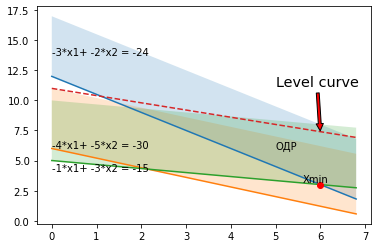

In [239]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

c = [3, 5]
A = [[-3, -2], [-4, -5], [-1, -3]]
b = [-24, -30, -15]
res = linprog(c, A_ub=A, b_ub=b, bounds=[(0, None), (0, None)])

def f(b, a1, a2, x):
    y = np.array([])
    for xIter in x:
        yIter = (b-a1*xIter)/a2
        y = np.append(y, yIter)
    return y

x = np.arange(0, 7, 0.2)
for i in range(len(A)):
    y = f(b=b[i], a1=A[i][0], x=x, a2=A[i][1])
    plt.plot(x, y)
    plt.fill_between(x, y, y+5, alpha=0.2)
    plt.text(0, f(b=b[i], a1=A[i][0], x=[i,], a2=A[i][1])+3-i-1.2, 
             '{a1}*x1+ {a2}*x2 = {b}'.format(a1=A[i][0], a2=A[i][1], b=b[i]), 
             rotation=0)
plt.plot(x, (c[0]*c[1]-np.abs(c[0])*x)/np.abs(c[1])+8, '--')
plt.plot(res.x[0], res.x[1], 'ro')
plt.text(res.x[0]-0.4, res.x[1]+0.2, 'Xmin')
plt.text(5, 6, 'ОДР')
plt.annotate('Level curve', 
             xy=(6, (c[0]*c[1]-np.abs(c[0])*2)/np.abs(c[1])+5.5), 
             xytext=(5, (c[0]*c[1]-np.abs(c[0])*3)/np.abs(c[1])+10), 
             size='x-large', arrowprops=dict(facecolor='red', arrowstyle='simple'))

plt.show()

<h4>E. Розв'язання задачi за допомогою scipy.optimize</h4>

In [219]:
import time
c = [3, 5]
A = [[-3, -2], [-4, -5], [-1, -3]]
b = [-24, -30, -15]

start = time.time()
res = linprog(c, A_ub=A, b_ub=b)
stop = time.time()
print(res)
print("Time:", stop-start)
optimize_time = stop-start

     con: array([], dtype=float64)
     fun: 32.99999984351905
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([-8.58942499e-08,  8.99999983e+00, -8.35321892e-08])
  status: 0
 success: True
       x: array([5.99999999, 2.99999998])
Time: 0.009976387023925781


<h4>F. Розв'язання задачi за допомогою pulp.LpProblem</h4>

In [221]:
import pulp
x1 = pulp.LpVariable("x1", lowBound=0)
x2 = pulp.LpVariable("x2", lowBound=0)
problem = pulp.LpProblem('0', pulp.LpMinimize)
problem += 3*x1 + 5*x2, "Objective function"
problem += 3*x1 + 2*x2 >= 24, 'first constrain'
problem += 4*x1 + 5*x2 >= 30, 'second constrain'
problem += x1 + 3*x2 >= 15, 'third constrain'
start = time.time()
problem.solve()
stop = time.time()
for var in problem.variables():
    print(var.name, '=', var.varValue)
print('Income:')
print(pulp.value(problem.objective))
print("Time:", stop-start)
pulp_time = stop-start

x1 = 6.0
x2 = 3.0
Income:
33.0
Time: 0.10372328758239746


<h4>G. Порівняння рішень за допомогою np.allclose ().</h4>


In [218]:
print(np.allclose([pulp.value(problem.objective)] + [var.varValue for var in problem.variables()], [res.fun, res.x[0], res.x[1]]))

True


<h4>H. Порівняйте час для розв’язання задачі за допомогою scipy.optimize та pulp.LpProblem, пояснiть результат.</h4>

In [224]:
print('Разница между pulp и optimize =', pulp_time - optimize_time)

Разница между optimize и pulp = 0.09374690055847168


От сюда следует, что время на решение у модуля pulp <b>больше</b> на 0.0937 для данной задачи.  
Это обусловлено разными алгоритмами для решения задач линейного программирования у этих модулей.

<b>Пояснення:</b> Для того щоб витратити мінімум грошей (33 ум. од) на покупку добрив, нам потрібно придбати перший тип сумiшi у кількості 6, а сумiшi другого типу у кiлькостi 3. Причому перша та третя речовина є дефіцитною, тобто повністю (без залишків) використовується, а друга речовина має залишок 9 од.

<h2>2. Розв’язання транспортної задачі.</h2>
<p>a. Опишіть введені змінні.  </p>
<p>b. Створіть математичну модель задачі.  </p>
<p>c. Вирішіть проблему за допомогою scipy.optimize.  </p>
<p>d. Поясніть отриманий результат.</p>

<h4>Транспортна задача:</h4> Задано 4 постачальники і 5 замовників для перевезення
однорідного вантажу. Кожен i-й постачальник має аі (і=1, 2, ... , m) одиниць
вантажу, а кожному j-му замовнику потрібно доставити bj (j=1, 2, ..., n)
одиниць вантажу. Задані тарифи (вартості) cij перевезення одиниці вантажу
від будь-якого і-го постачальника до будь-якого j-го замовника.
Транспортному підприємству, яке виконує перевезення вантажів, необхідно
визначити скільки одиниць вантажу xij потрібно перевезти від кожного і-го
постачальника до кожного j-го замовника щоб здійснити перевезення усіх
вантажів з мінімально-можливою загальною вартістю усіх перевезень

<table border="1"><caption>6 вариант</caption>
<tbody>
<tr><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>ai</td></tr>
<tr><td>14</td><td>8</td><td>7</td><td>15</td><td>9</td><td>85</td></tr>
<tr><td>4</td><td>5</td><td>11</td><td>8</td><td>14</td><td>110</td></tr>
<tr><td>15</td><td>12</td><td>6</td><td>5</td><td>9</td><td>65</td></tr>
<tr><td>10</td><td>8</td><td>6</td><td>4</td><td>5</td><td>80</td></tr>
<tr><td>90</td><td>70</td><td>70</td><td>60</td><td>50</td><td>340</td></tr>
</tbody>
</table>

$$ F(x) = 14x_{11} + 8x_{12} + 7x_{13} + 15x_{14} + 9x_{15} + 4x_{21} + 5x_{22} + 11x_{23} + 8x_{24}\\ + 14x_{25} + 15x_{31} + 12x_{32} + 6x_{33} + 5x_{34} + 9x_{35} + 10x_{41} + 8x_{42} + 6x_{43} + 4x_{44} + 5x_{45} \rightarrow \ min \\ Ограничения: \\ \left\{ \begin{array}\\ 14x_{11} + 8x_{12} + 7x_{13} + 15x_{14} + 9x_{15} = 85 \\ 4x_{21} + 5x_{22} + 11x_{23} + 8x_{24} + 14x_{25} = 110 \\ 15x_{31} + 12x_{32} + 6x_{33} + 5x_{34} + 9x_{35} = 65 \\ 10x_{41} + 8x_{42} + 6x_{43} + 4x_{44} + 5x_{45} = 80 \\ 14x_{11} + 4x_{21} + 15x_{31} + 10x_{41} = 90 \\ 8x_{12} + 5x_{22} + 12x_{32} + 8x_{42} = 70 \\ 7x_{13} + 11x_{23} + 6x_{33} + 6x_{43} = 70 \\ 15x_{14} + 8x_{24} + 5x_{34} + 4x_{44} = 60 \\ 9x_{15} + 14x_{25} + 9x_{35} + 5x_{45} = 50 \\ x_{ij} \geqslant 0, & i,j \geqslant 0 \ \end{array} \right. $$

In [244]:
c = [14, 8, 7, 15, 9, 4, 5, 11, 8, 14, 15, 12, 6, 5, 9, 10, 8, 6, 4, 5]
A = [[1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1],
     [1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0],
     [0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0],
     [0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0],
     [0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0],
     [0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1]] 
b = [85, 110, 65, 80, 90, 70, 70, 60, 50] 
res = linprog(c, A_eq=A, b_eq=b)
print('Решение:')
for i, var in enumerate(res.x):
    print("x", i//5+1, i%5+1, ' = ', round(var, 2), sep='', end = '; ')
    if i%5==4:
        print()
print("F(x)min =", round(res.fun, 2))

Решение:
x11 = 0.0; x12 = 50.0; x13 = 35.0; x14 = 0.0; x15 = 0.0; 
x21 = 90.0; x22 = 20.0; x23 = 0.0; x24 = 0.0; x25 = 0.0; 
x31 = 0.0; x32 = 0.0; x33 = 35.0; x34 = 30.0; x35 = 0.0; 
x41 = 0.0; x42 = 0.0; x43 = 0.0; x44 = 30.0; x45 = 50.0; 
F(x)min = 1835.0


<ipython-input-244-0f719b42df22>:12: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A, b_eq=b)
